In [1]:
import numpy as np
import pandas as pd
import math
from scipy.io import arff
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from category_encoders import TargetEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.decomposition import PCA
from scipy.stats import rankdata, norm, gaussian_kde
import matplotlib.pyplot as plt
from random import randrange

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [2]:
filename = "real_world_data/airline_dataset.csv"
data = pd.read_csv(filename)
df = pd.DataFrame(data)
df.head()

,Unnamed: 0,Airline,Flight,Time,Length,Delay
0,0,b'CO',269.0,15.0,205.0,1
1,1,b'US',1558.0,15.0,222.0,1
2,2,b'AA',2400.0,20.0,165.0,1
3,3,b'AA',2466.0,20.0,195.0,1
4,4,b'AS',108.0,30.0,202.0,0


In [3]:
train = df.iloc[:179794,:]
test = df.iloc[179794:,:]

ohe = OneHotEncoder()

X_train_num = train.drop(columns=["Airline", "Delay", "Unnamed: 0"])
X_train_cat = train[["Airline"]]
X_train_cat = ohe.fit_transform(X_train_cat).toarray()
X_train = np.concatenate([X_train_cat, X_train_num], axis=1)
X_test_num = test.drop(columns=["Airline", "Delay", "Unnamed: 0"])
X_test_cat = test[["Airline"]]
X_test_cat = ohe.transform(X_test_cat).toarray()
X_test = np.concatenate([X_test_cat, X_test_num], axis=1)

y_train = train[["Delay"]]
y_test = test[["Delay"]]

scaler = MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

X_train.head()

(179794, 21)
(359589, 21)
(179794, 1)
(359589, 1)


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.034306,0.003499,0.312977
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.199309,0.003499,0.338931
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.307092,0.006998,0.251908
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.315540,0.006998,0.297710
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013697,0.013996,0.308397


In [4]:
# Original hyperparameter optimization

# models = []

# k_range = range(1500, 2220, 3)

# k_scores = []

# for k in k_range:
#     model = KNeighborsClassifier(n_neighbors=k)
#     models.append(model)
#     score = cross_val_score(model, X_train, y_train.values.ravel(), cv=5).mean()
#     print(k, score)
#     k_scores.append(score) 

# plt.plot(k_range, k_scores)
# plt.show()

# model_knn = KNeighborsClassifier(n_neighbors=2066)
# np.mean(cross_val_score(model_knn, X_train, y_train.values.ravel(), cv=5))

In [5]:
# Cross-validation 20 times with randomly selected sequential leave-17k-out to measure the expected accuracy

cross_val_scores = []

for n in range(20):
    test_start = randrange(0, 179794 - 17000)
    test_end = test_start + 17000
    print(test_start, test_end)
    
    cross_val_y_test = y_train.iloc[test_start:test_end,:]
    cross_val_y_train_1 = y_train.iloc[:test_start,:]
    cross_val_y_train_2 = y_train.iloc[test_end:,:]
    cross_val_y_train = np.concatenate([cross_val_y_train_1, cross_val_y_train_2], axis=0)
    
    cross_val_X_test = X_train.iloc[test_start:test_end,:]
    cross_val_X_train_1 = X_train.iloc[:test_start,:]
    cross_val_X_train_2 = X_train.iloc[test_end:,:]
    cross_val_X_train = np.concatenate([cross_val_X_train_1, cross_val_X_train_2], axis=0)
    
    print(cross_val_X_train.shape)
    print(cross_val_y_test.shape)
    
    cross_val_model = KNeighborsClassifier(n_neighbors=2066)
    cross_val_model.fit(cross_val_X_train, cross_val_y_train.ravel())
    cval_score = cross_val_model.score(cross_val_X_test, cross_val_y_test)
    print(cval_score, '\n')
    cross_val_scores.append(cval_score)

np.mean(cross_val_scores)

123224 140224
(162794, 21)
(17000, 1)
0.7103529411764706 

152739 169739
(162794, 21)
(17000, 1)
0.6818235294117647 

87852 104852
(162794, 21)
(17000, 1)
0.652235294117647 

82673 99673
(162794, 21)
(17000, 1)
0.6491764705882352 

117509 134509
(162794, 21)
(17000, 1)
0.7212352941176471 

104702 121702
(162794, 21)
(17000, 1)
0.7253529411764705 

89608 106608
(162794, 21)
(17000, 1)
0.6696470588235294 

96546 113546
(162794, 21)
(17000, 1)
0.699764705882353 

76403 93403
(162794, 21)
(17000, 1)
0.643 

60777 77777
(162794, 21)
(17000, 1)
0.6905294117647058 

67369 84369
(162794, 21)
(17000, 1)
0.6714705882352942 

106574 123574
(162794, 21)
(17000, 1)
0.7258235294117648 

73664 90664
(162794, 21)
(17000, 1)
0.6414117647058823 

125797 142797
(162794, 21)
(17000, 1)
0.7103529411764706 

40754 57754
(162794, 21)
(17000, 1)
0.7278235294117648 

160117 177117
(162794, 21)
(17000, 1)
0.6924117647058824 

73577 90577
(162794, 21)
(17000, 1)
0.6415882352941177 

11045 28045
(162794, 21)
(170

0.6834499999999999

In [6]:
# X_test_batches = np.array_split(X_train, 6)
# y_test_batches = np.array_split(y_train, 6)
X_test_batches = []
y_test_batches = []

i = 0
while i < len(X_test):
    new_i = i + 17000
    if new_i > len(X_test):
        new_i = len(X_test)
    X_test_batches.append(X_test[i: new_i])
    y_test_batches.append(y_test[i: new_i])
    i = new_i

print(len(X_test_batches))
print(X_test_batches[0].shape)
print(y_test_batches[0].shape)
print(X_test_batches[-1].shape)
print(y_test_batches[-1].shape)

22
(17000, 21)
(17000, 1)
(2589, 21)
(2589, 1)


In [7]:
# models = [
#     model_knn,
#     model_rf,
#     model_svm,
#     model_pc,
#     model_lr
# ]

accs = []

# # 2066-1500 /3 ~= 189 (choose K~=2066)
# for i in range(1):
#     model = models[189]

#     model.fit(X_train, y_train.values.ravel())

#     accs.append([])

#     for batch in range(len(X_test_batches)):
#         accs[i].append(model.score(X_test_batches[batch], y_test_batches[batch]))

#     print(accs[i])

model_knn = KNeighborsClassifier(n_neighbors=2066)
model_knn.fit(X_train, y_train.values.ravel())
for batch in range(len(X_test_batches)):
    batch_score = model_knn.score(X_test_batches[batch], y_test_batches[batch])
    print('\n', batch_score)
    if batch_score < np.mean(cross_val_scores) - np.std(cross_val_scores):
        print("drift in batch", batch + 1)
    accs.append(batch_score)


 0.6770588235294117

 0.5417058823529411
drift in batch 2

 0.5935294117647059
drift in batch 3

 0.6555882352941177

 0.636235294117647
drift in batch 5

 0.5567647058823529
drift in batch 6

 0.5808823529411765
drift in batch 7

 0.5718823529411765
drift in batch 8

 0.6200588235294118
drift in batch 9

 0.5822941176470589
drift in batch 10

 0.5562941176470588
drift in batch 11

 0.5475882352941176
drift in batch 12

 0.623
drift in batch 13

 0.6551764705882352

 0.6313529411764706
drift in batch 15

 0.5631176470588235
drift in batch 16

 0.6124705882352941
drift in batch 17

 0.5592941176470588
drift in batch 18

 0.5250588235294118
drift in batch 19

 0.5390588235294118
drift in batch 20

 0.5758823529411765
drift in batch 21

 0.5739667825415218
drift in batch 22


0.6536316324515811


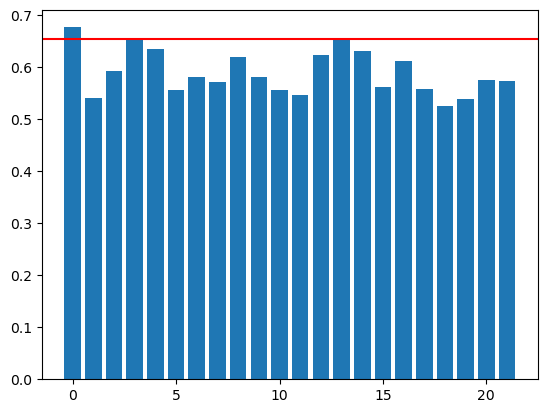

In [9]:
threshold = np.mean(cross_val_scores) - np.std(cross_val_scores)
print(threshold)
plt.bar(range(0, len(X_test_batches)), accs)
plt.axhline(y=threshold, color='r', linestyle='-')
plt.show()